In [2]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
import itertools
#warnings.filterwarnings("ignore")
matplotlib.rcParams['axes.labelsize'] 
matplotlib.rcParams['xtick.labelsize'] 
matplotlib.rcParams['ytick.labelsize'] 
matplotlib.rcParams['text.color'] = 'k'

In [3]:
path_to_data = 'https://raw.githubusercontent.com/bashirmohd/DataSceince/master/Time-series-prediction_production/cern-513_wash_out.csv'

In [4]:
df = pd.read_csv(path_to_data)

In [5]:
df.head()

,Days,Speed
0,16/10/2018 00:00,585.652850
1,16/10/2018 01:00,719.141197
2,16/10/2018 02:00,903.577400
3,16/10/2018 03:00,901.849704
4,16/10/2018 04:00,764.589890


In [6]:
df.tail()

,Days,Speed
2155,13/01/2019 19:00,1107.255585
2156,13/01/2019 20:00,1072.885087
2157,13/01/2019 21:00,869.034227
2158,13/01/2019 22:00,1260.192950
2159,13/01/2019 23:00,948.649530


In [7]:
df.isnull().sum()
df.dtypes

Days      object
Speed    float64
dtype: object

Text(0.5,1,'Aofa_Lond_in Link Speed Over Time In Hours')

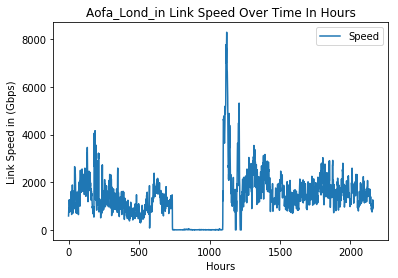

In [8]:
df.plot()
plt.xlabel('Hours')
plt.ylabel('Link Speed in (Gbps)')
plt.title('Aofa_Lond_in Link Speed Over Time In Hours')

In [9]:
df['Days'] =  pd.to_datetime(df['Days'], infer_datetime_format=True)

In [10]:
df = df.set_index('Days')

In [11]:
average_daily_speed = df.resample('D').mean()

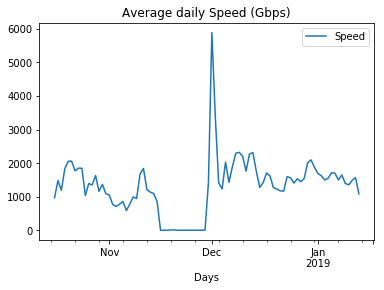

In [12]:
average_daily_speed.plot()
plt.title('Average daily Speed (Gbps)')
plt.show()

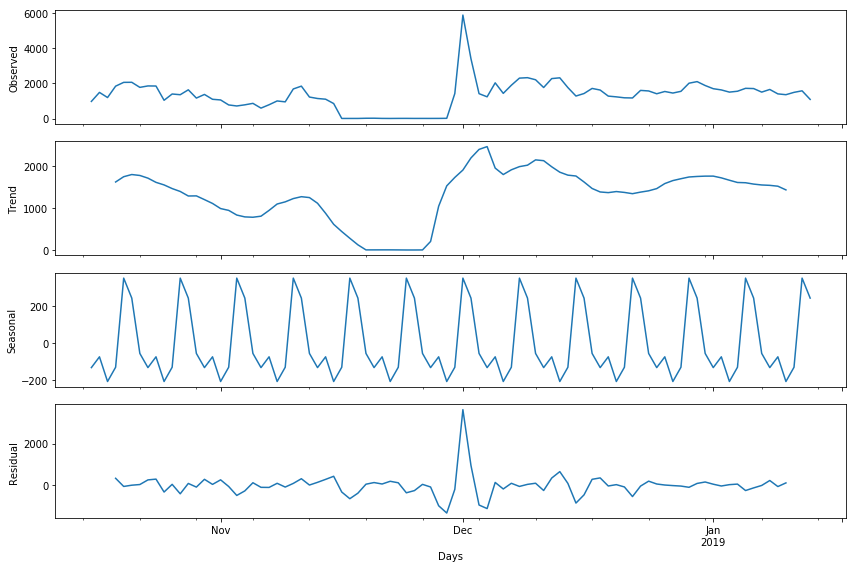

In [13]:
# Seaconal Decomposition of the Network Trace Data
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(average_daily_speed, model='additive')
fig = decomposition.plot()
plt.show()

In [14]:
# Define the p, d and q parameters to take any value between 0 and 2
# Generate all different combinations of p, q and q triplets
# Generate all different combinations of seasonal p, q and q triplets
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [15]:
print('Possible Parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Possible Parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [16]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [17]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(average_daily_speed,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1564.7859601063476
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1331.597402125196
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1322.9397213069442
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1092.1325136283474
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1326.438208746221
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1282.8717093876385
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1125.317627755257
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1094.2090210726442
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1470.2647304208563
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1257.8510973211683
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1266.9587915476359
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1039.2075697667242
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1278.9808096448567
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1229.9320972378964
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1089.8057954313688
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1040.9742232730796
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1396.9177521527854
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1215.921056070

In [18]:
#ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1022.054114433866


In [19]:
mod = sm.tsa.statespace.SARIMAX(average_daily_speed,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6358      0.209      3.036      0.002       0.225       1.046
ma.L1         -0.9091      0.174     -5.230      0.000      -1.250      -0.568
ma.S.L12      -1.0022      0.107     -9.350      0.000      -1.212      -0.792
sigma2      4.565e+05   2.36e-07   1.93e+12      0.000    4.56e+05    4.56e+05
